# Task 2.2
## Gaussian Mixture Models

### Exploración y preprocesamiento del dataset

**Importar Librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Limpiar los warnings
warnings.filterwarnings('ignore')

**Cargar el dataset al entorno**

In [2]:
df = pd.read_csv("bank_transactions.csv", sep=",")
# df = df.sample(n = 1000, random_state = 42)

**Visualizar estructura e información general del dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


**Verificar existencia de valores nulos**

In [5]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

**Calcular impacto de nulos en el dataset**

In [6]:
# Calcular el porcentaje de valores nulos en todo el DataFrame
porcentaje_total_nulos = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Imprimir el porcentaje total de valores nulos
print(f"Porcentaje total de valores nulos en el DataFrame: {porcentaje_total_nulos:.2f}%")

Porcentaje total de valores nulos en el DataFrame: 0.07%


Dado que la cantidad de samples con valores nulos equivale a menos del 1% del dataset, eliminarlos no tendrá impacto perceptible en el análisis.

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**Procesamiento de atributos relacionados con el tiempo y/o la fecha**

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionTime'] = df['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

**Estadísticas descriptivas**

In [9]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount (INR)
count,1041614,1.041614e+06,1041614,1.041614e+06
mean,1984-06-14 07:19:26.493537856,1.149986e+05,2016-07-25 19:23:05.559718400,1.566096e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00
25%,1983-08-15 00:00:00,4.728140e+03,2016-06-09 00:00:00,1.600000e+02
50%,1988-10-08 00:00:00,1.676852e+04,2016-08-20 00:00:00,4.575000e+02
75%,1992-06-26 00:00:00,5.742885e+04,2016-09-09 00:00:00,1.200000e+03
max,2073-12-31 00:00:00,1.150355e+08,2016-12-09 00:00:00,1.560035e+06
std,NaN,8.467609e+05,NaN,6.561464e+03


**Conteo de valores únicos en características categorías**

Para característica de 'Género'

In [10]:
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

Se identifica un único registro con el valor 'T' en la variable de género, por lo tanto, se procede a su eliminación

In [11]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

Para característica de 'Ubicación'

In [12]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

*Requiere de codificación

In [13]:
df['CustomerDOB'].value_counts()

CustomerDOB
1800-01-01    56291
1989-01-01      809
1990-01-01      784
1991-06-08      698
1991-01-01      665
              ...  
2051-02-12        1
2052-03-20        1
2047-09-26        1
2041-04-10        1
2044-10-24        1
Name: count, Length: 17233, dtype: int64

In [14]:
# Calcular el número de registros a eliminar
registros_a_eliminar = len(df[df['CustomerDOB'].dt.year == 1800])

# Calcular el porcentaje de registros eliminados
porcentaje_registros_eliminados = (registros_a_eliminar / len(df)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de registros a eliminar: {porcentaje_registros_eliminados:.2f}%")

Porcentaje de registros a eliminar: 5.40%


Se detecta la existencia de múltiples fechas de nacimiento registradas en el año 1800, lo cual resulta inconsistente con el resto de datos. Dado que estas instancias representan solo el 5% del total de datos, se opta por su eliminación del conjunto de datos.

In [15]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index, axis=0)

**Corregir fechas de nacimiento mayores al año actual**

In [16]:
df.loc[df.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] - pd.DateOffset(years=100)

Se aplica un offset de 100 años a las fechas de nacimiento mayores al año actual

**Convertir fecha de nacimiento a edad**

In [17]:
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25).round(0)

**Ver el dataset actualizado**

In [18]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,29.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,15:24:18,27999.0,67.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,27.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.0,50.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,36.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,03:20:24,799.0,34.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,03:02:14,460.0,32.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,02:55:13,770.0,35.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,03:18:26,1000.0,45.0


**Gráficas de distribución**

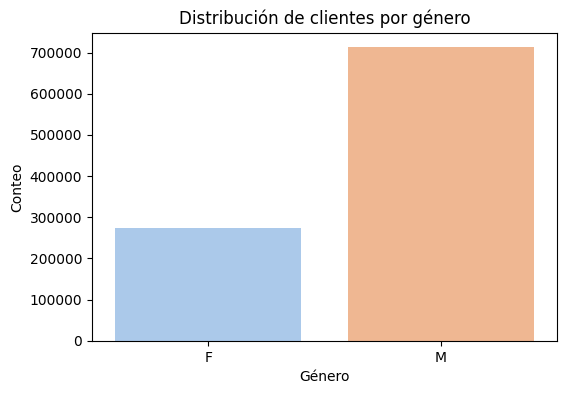

In [19]:
# 1. Distribución de clientes por género
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender', data = df, palette='pastel')
plt.title('Distribución de clientes por género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

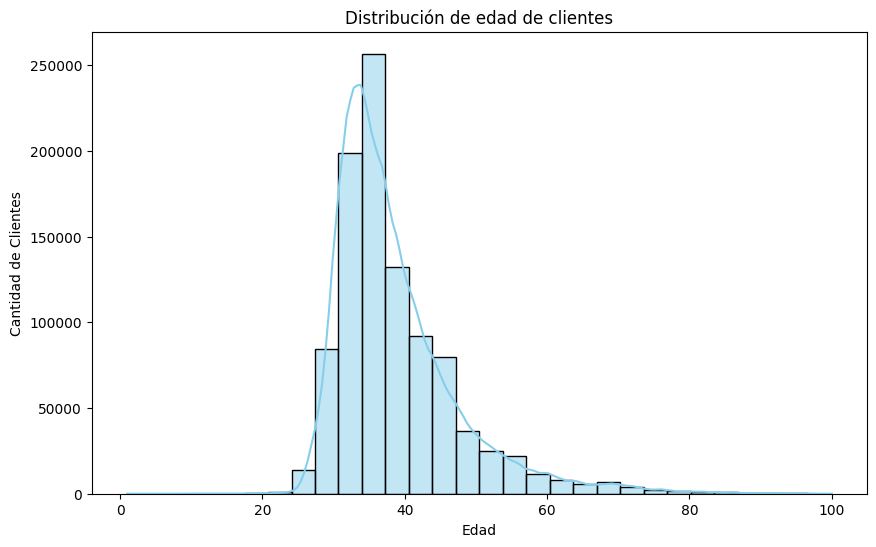

In [20]:
# 2. Distribución de edad de clientes
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edad de clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

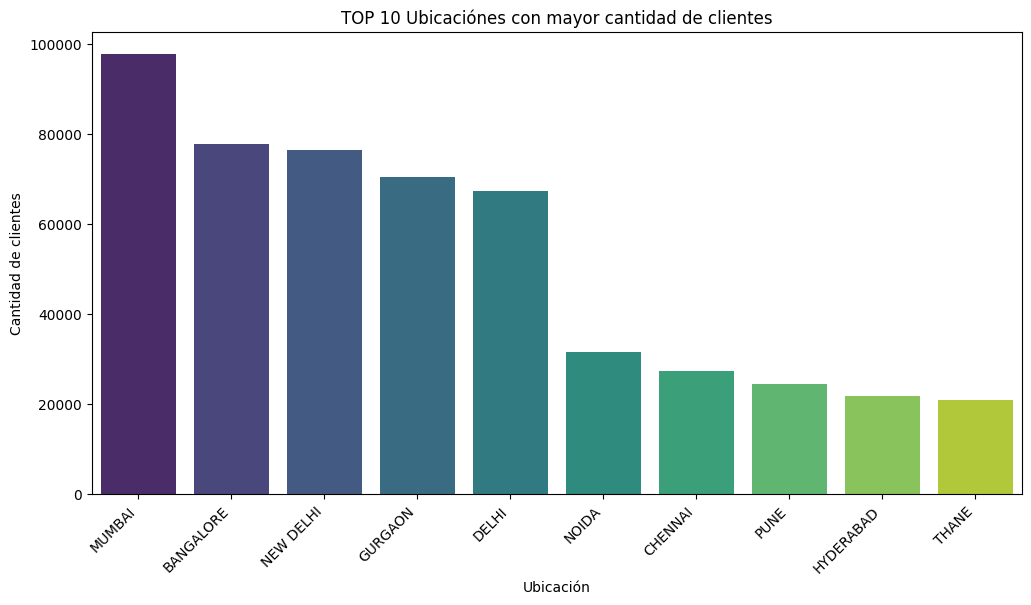

In [21]:
# 3. TOP 10 Ubicaciónes con mayor cantidad de clientes
location_counts = df['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('TOP 10 Ubicaciónes con mayor cantidad de clientes')
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Eliminación de transacciones con monto de 0**

In [22]:
# Conteo de registros con un monto de 0 en la transacción
df[df['TransactionAmount (INR)'] == 0].count()

# Eliminar los registros encontrados
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

La eliminación de transacciones de 0 rupias ayuda a evitar distorsiones en el análisis de los datos, al eliminar registros improbables o erróneos.

**Manejo de valores atípicos**

In [23]:
# Manejo de valores atípicos utilizando el método del rango intercuartílico (IQR)
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Primer cuartil
    Q3 = data[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Manejo de valores atípicos para las columnas CustAccountBalance y TransactionAmount (INR)
df = handle_outliers_iqr(df, 'CustAccountBalance')
df = handle_outliers_iqr(df, 'TransactionAmount (INR)')

Manejar valores atípicos es crucial para mantener la precisión de los análisis y modelos, ya que estos valores pueden distorsionar los resultados.

**Codificación a las características pertinentes**

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Codificación para las columnas 'CustGender' y 'CustLocation'
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,0,3116,17819.050,2016-02-08,15:46:47,25.00000,29.0
1,T2,C2142763,1957-04-04,1,3173,2270.690,2016-02-08,15:24:18,2588.46125,67.0
2,T3,C4417068,1996-11-26,0,4623,17874.440,2016-02-08,15:38:32,459.00000,27.0
3,T4,C5342380,1973-09-14,0,4623,127393.105,2016-02-08,15:38:34,2060.00000,50.0
4,T5,C9031234,1988-03-24,0,4963,6714.430,2016-02-08,02:19:16,1762.50000,36.0


**Selección de características relevantes**

In [25]:
features = df.drop(['TransactionID',
                    'CustomerID',
                    'CustomerDOB',
                    'TransactionDate',
                    'TransactionTime'],
                    axis=1)

Se han seleccionado las siguientes caracteristicas:
- CustomerAge: Edad del cliente.
- CustGender: Género del cliente.
- CustLocation: Ubicación del cliente.
- CustAccountBalance: Saldo de la cuenta del cliente.
- TransactionAmount (INR): Monto de la transacción en rupias indias.

Estas características han sido seleccionadas debido a su relevancia potencial para el análisis de segmentación de clientes. La edad, género, ubicación, saldo de la cuenta y monto de las transacciones son variables que pueden ayudar a identificar patrones y segmentar clientes de manera efectiva. 

Las otras características fueron eliminadas porque no aportan información relevante sobre las similitudes o diferencias entre las muestras.

**Estandarización de las características**

In [26]:
from sklearn.preprocessing import StandardScaler

# Columnas a escalar
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar las características
features = scaler.fit_transform(features)
features = pd.DataFrame(features,columns=columns_names)

# Mostrar el dataset escalado
features

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-1.615620,-0.229982,-0.434486,-0.908036,-1.102073
1,0.618957,-0.202620,-0.789003,2.149892,3.234776
2,-1.615620,0.493427,-0.433223,-0.390321,-1.330329
3,-1.615620,0.493427,2.063905,1.519496,1.294607
4,-1.615620,0.656638,-0.687681,1.164611,-0.303180
...,...,...,...,...,...
984609,0.618957,0.705121,-0.666687,0.015261,-0.531435
984610,0.618957,0.646077,-0.218051,-0.389129,-0.759690
984611,0.618957,-0.308227,2.063905,-0.019333,-0.417308
984612,0.618957,2.102974,-0.610080,0.255032,0.723969
